<a href="https://colab.research.google.com/github/junshenlye/FYP-Wifi_Support/blob/main/Mold_Insert_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

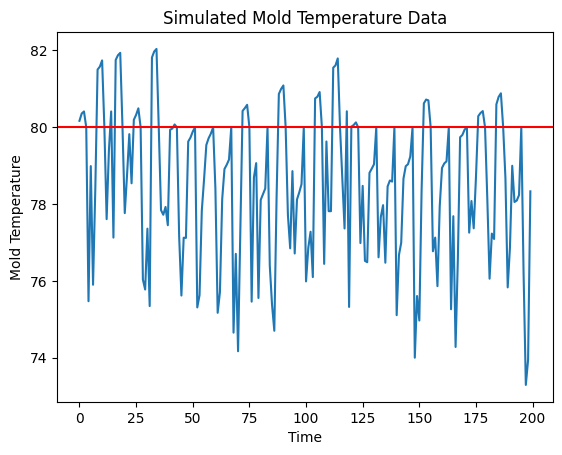

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Parameters for data simulation
num_cycles = 25
cycle_length = 4
stable_temp = 80.0
initial_temp_range = [78.0, 82.0]

# Simulate data
data = []
for cycle in range(num_cycles):
    initial_temp = np.random.uniform(initial_temp_range[0], initial_temp_range[1])
    temp = [initial_temp] * cycle_length
    for i in range(1, cycle_length):
        temp[i] = temp[i-1] + np.random.normal(0.1, 0.05)
    temp[-1] = stable_temp
    data += temp

    # Simulate mold insert temperature
    mold_insert_temp = [t - np.random.uniform(1.0, 5.0) for t in temp]
    data += mold_insert_temp


# Plot data
plt.plot(data)
plt.axhline(y=stable_temp, color='r', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Mold Temperature')
plt.title('Simulated Mold Temperature Data')
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -433.909
Date:                Wed, 26 Apr 2023   AIC                            879.819
Time:                        07:38:29   BIC                            899.548
Sample:                             0   HQIC                           887.805
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8514      0.073    -11.604      0.000      -0.995      -0.708
ar.L2         -0.4815      0.109     -4.413      0.000      -0.695      -0.268
ar.L3         -0.3795      0.113     -3.361      0.0

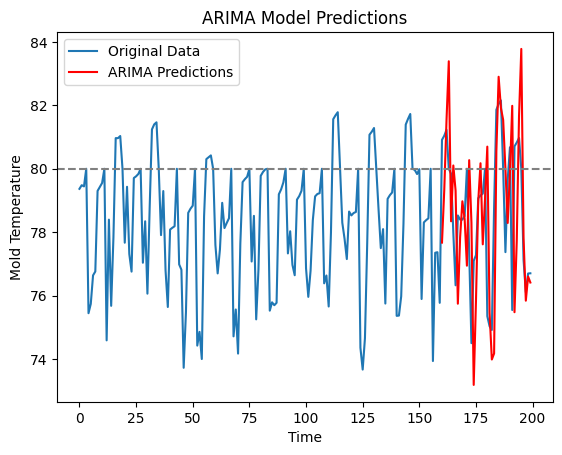

In [ ]:
# Fit ARIMA model to data
model = sm.tsa.ARIMA(data, order=(5, 2, 0))  # AR(1) model
results = model.fit()

# Print model summary
print(results.summary())

# Generate predictions
start_idx = int(len(data) * 0.8)  # use last 20% of data as test set
end_idx = len(data) - 1
predictions = results.predict(start=start_idx, end=end_idx)

# Calculate root mean squared error
#rmse = np.sqrt(mean_squared_error(data[start_idx:end_idx+1], predictions))
#print(f"RMSE: {rmse:.3f}")

# Plot original data and predictions
plt.plot(data, label='Original Data')
plt.plot(range(start_idx, end_idx+1), predictions, color='red', label='ARIMA Predictions')
plt.axhline(y=stable_temp, color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Mold Temperature')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()
